In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing CSV file
df = pd.read_csv("credit data.csv")
print("Shape of the data",df.shape)

Shape of the data (36457, 20)


In [3]:
df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0


In [4]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [6]:
#checking null values in data
df.isnull().sum()

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

Column "Job Title" containing 11323 null values. Will drop this column.

In [7]:
df = df.drop(columns=['Job title'])

In [8]:
df.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

Checking % of data present overall in dataframe

<Axes: title={'center': 'Type of our data'}, ylabel='count'>

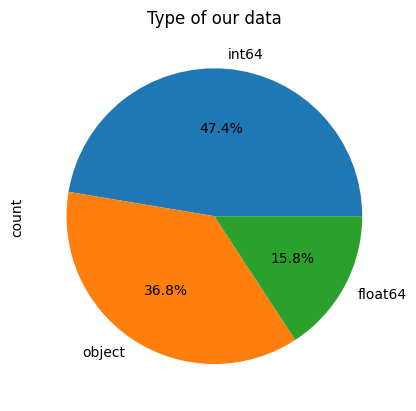

In [9]:
plt.title('Type of our data');
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%')

Checking distribution of data

<Axes: title={'center': 'Distribution of Account age'}, ylabel='Frequency'>

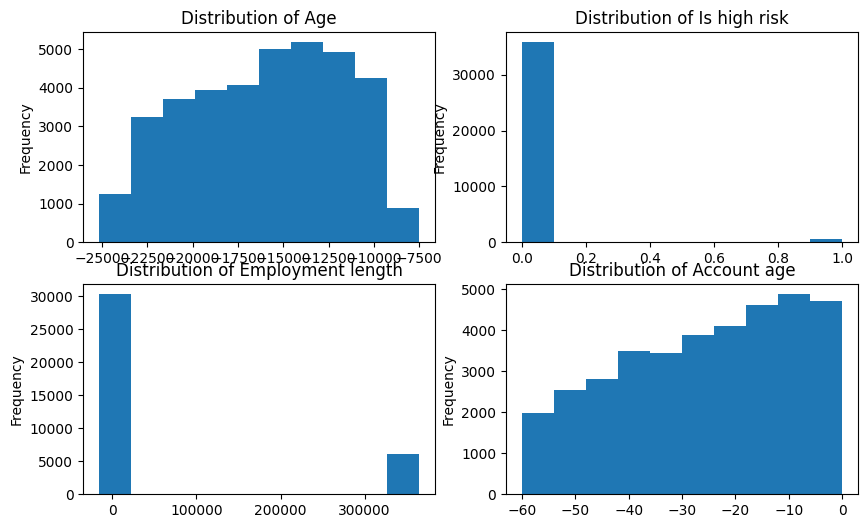

In [10]:
paper, axes = plt.subplots(2, 2, figsize=(10,6))
df['Age'].plot(kind='hist', title = 'Distribution of Age', ax = axes[0,0])
df['Is high risk'].plot(kind='hist', title = 'Distribution of Is high risk', ax = axes[0,1])
df['Employment length'].plot(kind='hist', title = 'Distribution of Employment length', ax = axes[1,0])
df['Account age'].plot(kind='hist', title = 'Distribution of Account age', ax = axes[1,1])

We have categorical column, will provide numbers

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# columns to encode
columns_to_encode = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                     'Education level', 'Marital status', 'Dwelling']

# Encode each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

Checking Correlation of dataframe

<function matplotlib.pyplot.show(close=None, block=None)>

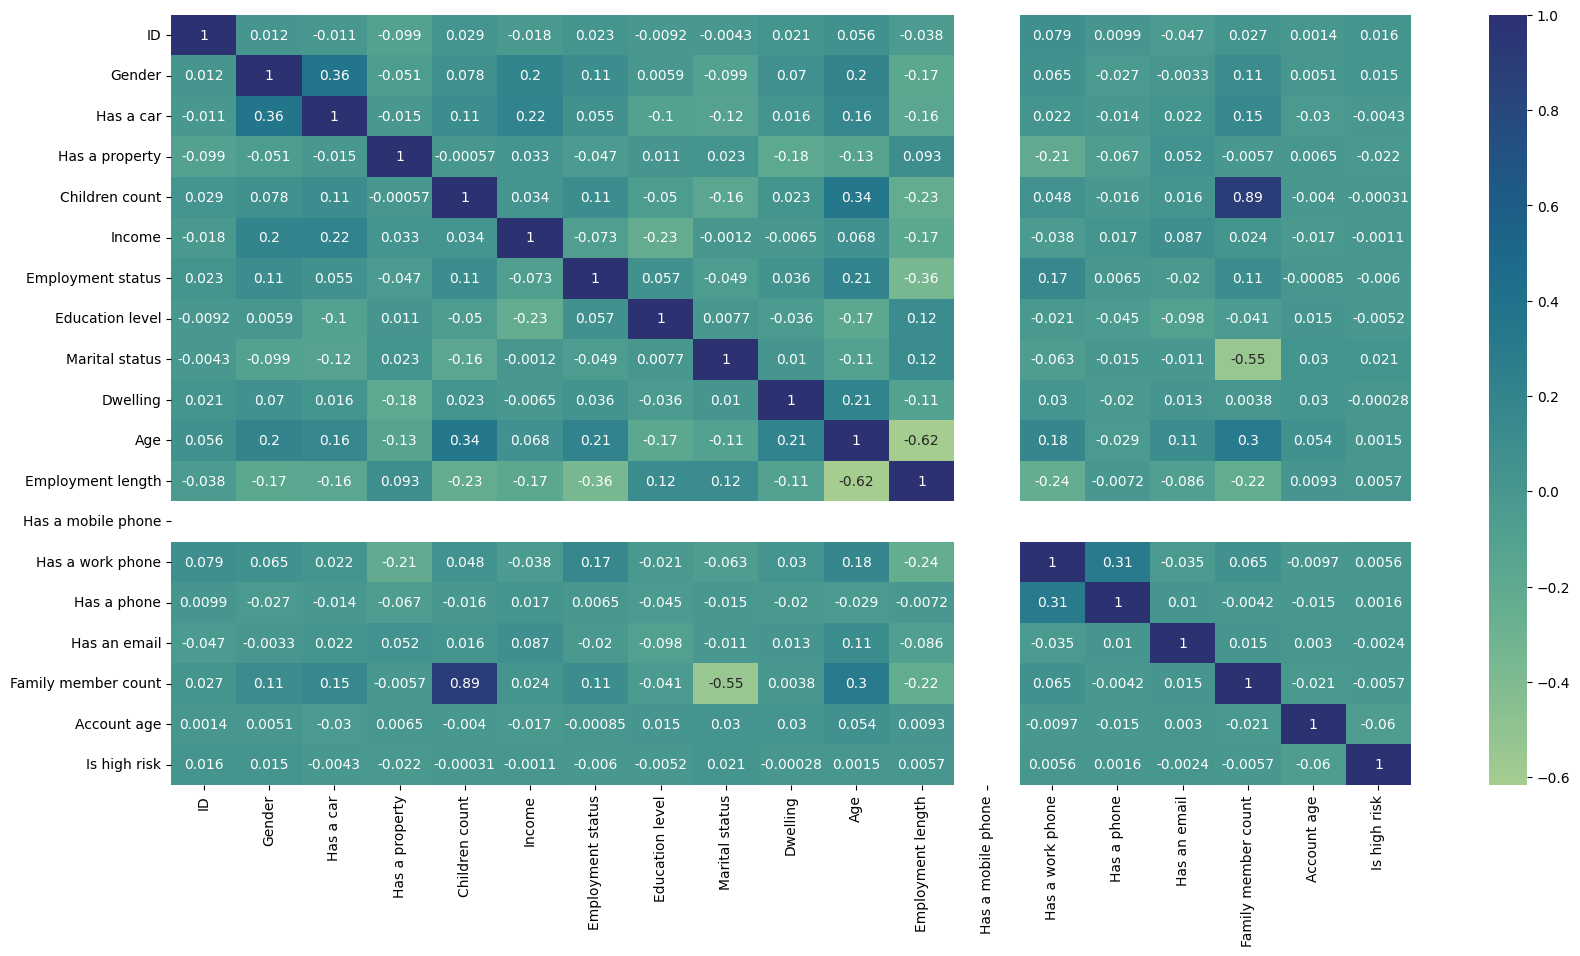

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show

We can observe that 'Has a mobile phone' column is not correlatd to any other columns. Hence we drop that column. Moreover, the columns which are highly correlatd, we will drop one of those too...

In [13]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Has a mobile phone'])
df = df.drop(columns=['Children count'])
df = df.drop(columns=['Age'])
df = df.drop(columns=['Family member count'])

In [14]:
df.head(2)

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Employment length,Has a work phone,Has a phone,Has an email,Account age,Is high risk
0,1,1,1,135000.0,4,4,1,5,-3111,0,0,0,-17.0,0
1,0,1,0,135000.0,0,1,3,1,-1651,0,0,0,-1.0,0


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# defining the features and target
X = df.drop(['Is high risk'],axis=1)
y = df[['Is high risk']]

In [17]:
y['Is high risk'].value_counts()

Is high risk
0    35841
1      616
Name: count, dtype: int64

We have data imbalancing in target column. We will use SMOTE technique to balance the data.

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
y_resampled['Is high risk'].value_counts()

Is high risk
0    35841
1    35841
Name: count, dtype: int64

Splitting the data into training and testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state= 10)

Now we do data preprocessing using standard scaler so that mean(0) and standard deviation(1)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (57345, 13) (57345, 1)
Shape for testing data (14337, 13) (14337, 1)


**First we will build ML models :**
**1. Logistic Regression**

In [23]:
# Instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

# Generating the classification report using the true labels and predicted labels from the test set
cr = classification_report(y_test, predicted)
print("Classification Report:\n", cr)

# Printing the test accuracy
print("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")

Confusion Matrix : 
 [[5068 2127]
 [2096 5046]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      7195
           1       0.70      0.71      0.70      7142

    accuracy                           0.71     14337
   macro avg       0.71      0.71      0.71     14337
weighted avg       0.71      0.71      0.71     14337

The test accuracy of Logistic Regression is :  70.54474436771989 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**2. RandomForest Classifier**

In [24]:
RFC = RandomForestClassifier(n_jobs = 4,random_state = 5,n_estimators = 100,max_depth = 5,verbose = False)
RFC.fit(X_train, y_train)

<ipython-input-24-662e42296b59>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=4, random_state=5, verbose=False)

In [25]:
#Training Data
rf_predictions_train = RFC.predict(X_train)
asc = accuracy_score(y_train, rf_predictions_train)
cr = classification_report(y_train, rf_predictions_train)
print("Accuracy Score is:", asc)
print(cr)

Accuracy Score is: 0.7740866684104979
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     28646
           1       0.79      0.75      0.77     28699

    accuracy                           0.77     57345
   macro avg       0.77      0.77      0.77     57345
weighted avg       0.77      0.77      0.77     57345



In [26]:
#Testing Data
rf_predictions_test = RFC.predict(X_test)
asc = accuracy_score(y_test, rf_predictions_test)
cr = classification_report(y_test, rf_predictions_test)
print("Accuracy Score is:", asc)
print(cr)

Accuracy Score is: 0.7775685289809584
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      7195
           1       0.79      0.76      0.77      7142

    accuracy                           0.78     14337
   macro avg       0.78      0.78      0.78     14337
weighted avg       0.78      0.78      0.78     14337



**3. KNN Classifier**

In [27]:
# instantiating the object
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train,y_train)

# calculating the predictions
knn_pred = knn.predict(X_test)

# Confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("KNN Accuracy Score = ",knn_acc_score)

# Generate classification report
cr = classification_report(y_test, knn_pred)
print(cr)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


confusion matrix
[[6274  921]
 [ 377 6765]]


KNN Accuracy Score =  0.9094650205761317
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7195
           1       0.88      0.95      0.91      7142

    accuracy                           0.91     14337
   macro avg       0.91      0.91      0.91     14337
weighted avg       0.91      0.91      0.91     14337



Based on the model performance, it is evident that the KNN classifier outperforms both the logistic regression and random forest models in terms of accuracy. With an accuracy of 0.90, the KNN classifier demonstrates the highest predictive power among the three models. This indicates that the KNN classifier is better suited for the given task compared to logistic regression and random forest. However, it's important to consider other metrics and factors such as computational complexity, interpretability, and the specific requirements of the problem when choosing the final model for deployment.